<a href="https://colab.research.google.com/github/Keoni808/Visuals/blob/main/Linear_Transformations_(Figures).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# "Understanding Linear Transformations: A Guide for Self-Learners, By a Self-Learner"


In [ ]:
# Mount your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Imports**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D

# used to adjust grid
from matplotlib.ticker import MultipleLocator

# Figure 1 (Example of Function / Mapping)


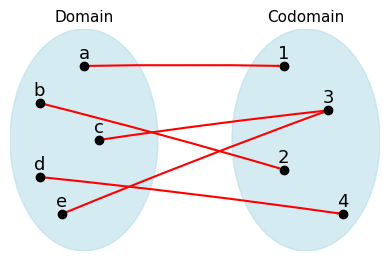

In [ ]:
def draw_set(ax, center, width, height, label, points, point_labels):
    # Draw an oval representing a set
    set_oval = patches.Ellipse(center, width, height, color='lightblue', fill=True, alpha=0.5)
    ax.add_patch(set_oval)
    ax.text(center[0], center[1] + height/2 + 0.1, label, ha='center', fontsize=11)

    # Draw points inside the oval
    for i, point in enumerate(points):
        ax.plot(center[0] + point[0], center[1] + point[1], 'o', color='black')
        ax.text(center[0] + point[0], center[1] + point[1] + 0.1, point_labels[i], ha='center', fontsize=13)

# Initialize plot
fig, ax = plt.subplots(figsize=(4, 3))

# Define properties for domain and codomain
domain_center = [1.5, 0]
codomain_center = [4.5, 0]
set_width, set_height = 2, 3

# Points in the domain and codomain
domain_points = np.array([[0, 1], [-0.6, 0.5], [0.2, 0], [-0.6, -0.5], [-0.3, -1]])
codomain_points = np.array([[-0.3, 1], [-0.3, -0.4], [0.3, 0.4], [0.5, -1]])

# Draw sets
draw_set(ax, domain_center, set_width, set_height, 'Domain', domain_points, ['a', 'b', 'c', 'd', 'e'])
draw_set(ax, codomain_center, set_width, set_height, 'Codomain', codomain_points, ['1', '2', '3', '4'])

# Draw arrows from domain to codomain points
mappings = [0, 1, 2, 3, 2]  # Mapping index from domain points to codomain points
for d_point, map_idx in zip(domain_points, mappings):
    arrow = patches.FancyArrowPatch((domain_center[0] + d_point[0], domain_center[1] + d_point[1]),
                                    (codomain_center[0] + codomain_points[map_idx][0], codomain_center[1] + codomain_points[map_idx][1]),
                                    connectionstyle="arc3,rad=-.01", color="red", arrowstyle='->', linewidth=1.5)
    ax.add_patch(arrow)

# Set limits and aspect
# ax.set_xlim(-1, 7)
# ax.set_ylim(-2, 2)
ax.set_aspect('equal')
ax.axis('off')  # Turn off the axis
plt.tight_layout(h_pad=0.0, w_pad=0.0)
plt.margins(0)
plt.show()

fig.savefig('FunctionOrMapping.png')

# Figure 2 (visual example of a linear transformation)
1. Domain space with vectors in it
2. Codomain space with transformed vectors in it
  - The matrix that I want to use for the transformation, I would like to use a basic example that will give whole numbers. (e.i. the vectors from domain to codomain will both have whole numbers as coefficients)

In [ ]:
# Define the vectors in the domain space
vectors = np.array([[2, 3], [1, -2]])
origin = np.zeros((2, 2))  # Origin points for the vectors

# Define a transformation matrix
transformation_matrix = np.array([
    [-1, 0],
    [0, 1]
])

# Apply the transformation matrix to the vectors
transformed_vectors = vectors @ transformation_matrix.T

In [ ]:
print(transformed_vectors)

[[-2  3]
 [-1 -2]]


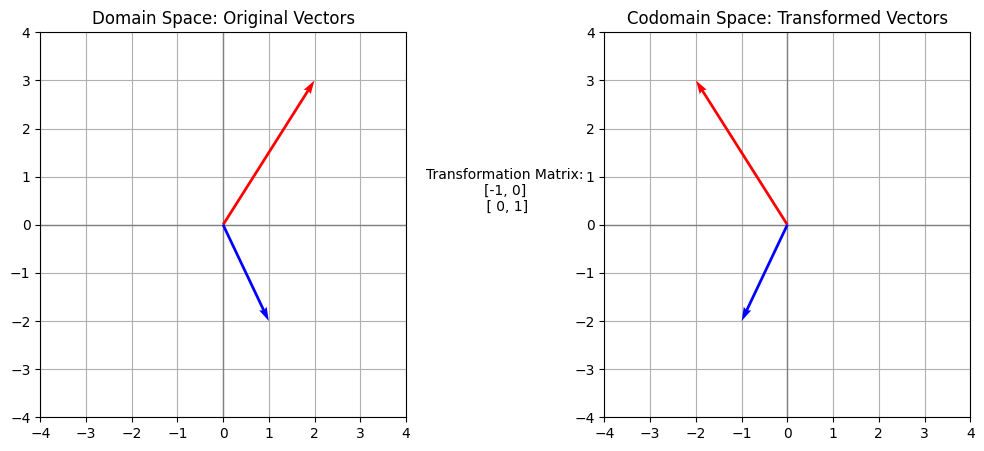

In [ ]:
fig = plt.figure(figsize=(12, 5))

# Plot original vectors
ax1 = fig.add_subplot(1,15, (1, 6))
ax1.quiver(*origin.T, *vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.axhline(0, color='grey', linewidth=1.0)
ax1.axvline(0, color='grey', linewidth=1.0)
ax1.grid(True)
ax1.set_title('Domain Space: Original Vectors')

# Plot transformed vectors
ax2 = fig.add_subplot(1,15,(10, 15))
ax2.quiver(*origin.T, *transformed_vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.axhline(0, color='grey', linewidth=1.0)
ax2.axvline(0, color='grey', linewidth=1.0)
ax2.grid(True)
ax2.set_title('Codomain Space: Transformed Vectors')

# Adding matrix annotation
matrix_str = f'Transformation Matrix:\n[-1, 0]\n [ 0, 1]'
ax3 = fig.add_subplot(1,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')
ax3.axis('off')

# fig.tight_layout(pad=3.0)
fig.savefig('BasicLinearTransformation.png')

# Figure 3 (Column Space Visual)

In [ ]:
# Define the vectors in the domain space
vectors = np.array([[2, 3], [1, -2]])
origin = np.zeros((2, 2))  # Origin points for the vectors

transformation_matrix = np.array([
    [0, 0],
    [0, 1]
])

# Apply the transformation matrix to the vectors
transformed_vectors = vectors @ transformation_matrix.T

In [ ]:
print(transformation_matrix)

[[0 0]
 [0 1]]


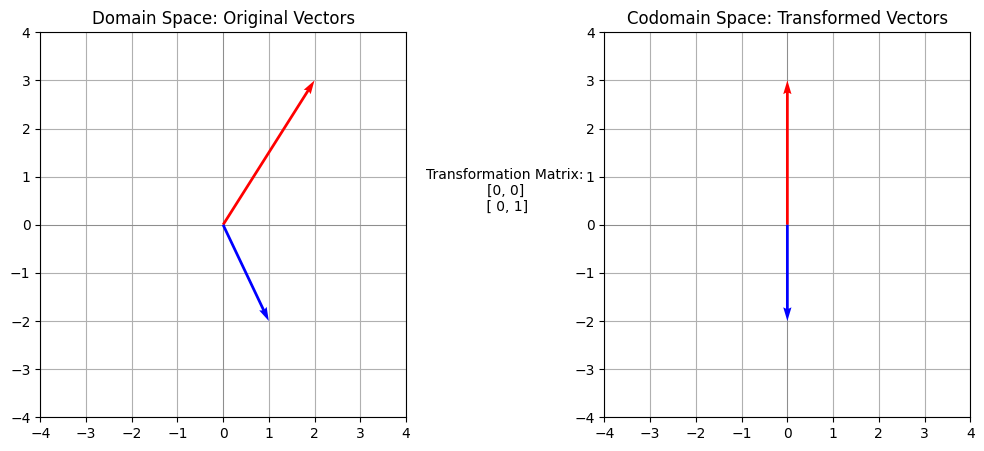

In [ ]:
fig = plt.figure(figsize=(12, 5))

# Plot original vectors
ax1 = fig.add_subplot(1,15, (1, 6))
ax1.quiver(*origin.T, *vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy', zorder = 3)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-4, 4)
ax1.axhline(0, color='grey', linewidth=0.5)
ax1.axvline(0, color='grey', linewidth=0.5)
ax1.grid(True)
ax1.set_title('Domain Space: Original Vectors')

# Plot transformed vectors
ax2 = fig.add_subplot(1,15,(10, 15))
ax2.quiver(*origin.T, *transformed_vectors.T, color=['r', 'b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.set_xlim(-4, 4)
ax2.set_ylim(-4, 4)
ax2.axhline(0, color='grey', linewidth=0.5)
ax2.axvline(0, color='grey', linewidth=0.5)
ax2.grid(True)
ax2.set_title('Codomain Space: Transformed Vectors')

# Adding matrix annotation
matrix_str = f'Transformation Matrix:\n[0, 0]\n [ 0, 1]'
ax3 = fig.add_subplot(1,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')
ax3.axis('off')

# fig.tight_layout(pad=3.0)
fig.savefig('ColumnSpace.png')

# Figure 4 (2D to 3D Linear Transformation)

In [ ]:
vectors = np.array([2, 3])
origin = np.zeros((1, 2))

# Define the transformation matrix
A = np.array([[1, 0],
              [0, 1],
              [1, 0]])

transformed_vectors = A @ vectors

In [ ]:
transformed_vectors

array([2, 3, 2])

In [ ]:
basis = np.array([[2, 0, 0], [0, 3, 0], [0, 0, 2]])

In [ ]:
descriptive_transformed_vectors = np.concatenate(([transformed_vectors], basis), axis=0)
descriptive_transformed_vectors

array([[2, 3, 2],
       [2, 0, 0],
       [0, 3, 0],
       [0, 0, 2]])

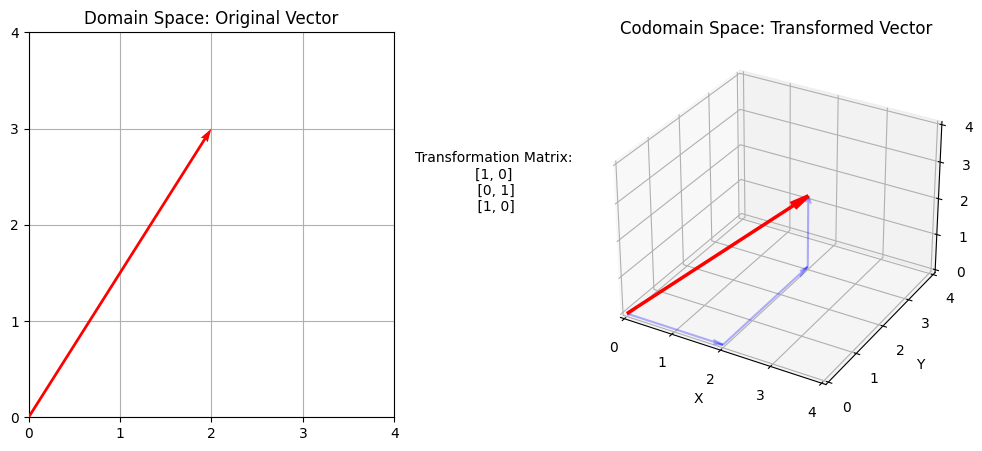

In [ ]:
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1,15, (1, 6))
ax1.quiver(*origin.T, *vectors.T, color=['r'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=3)

ax1.set_xlim(0, 4)
ax1.set_ylim(0, 4)
ax1.axhline(0, color='grey', linewidth=0.5)
ax1.axvline(0, color='grey', linewidth=0.5)
ax1.grid(True)
ax1.set_title('Domain Space: Original Vector')

# Set the grid to show at each integer interval
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(1))

ax2 = fig.add_subplot(1,15,(10, 15), projection='3d')
ax2.quiver(0,0,0, *descriptive_transformed_vectors[0], color=['r'], length=1, linewidth=2.5, arrow_length_ratio=0.09, zorder=3)
ax2.quiver(0,0,0, *descriptive_transformed_vectors[1], color=['b'], length=1, arrow_length_ratio=0.1, alpha=0.3)
ax2.quiver(2,0,0, *descriptive_transformed_vectors[2], color=['b'], length=1, arrow_length_ratio=0.1, alpha=0.3)
ax2.quiver(2,3,0, *descriptive_transformed_vectors[3], color=['b'], length=1, arrow_length_ratio=0.1, alpha=0.3)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([0, 4])
ax2.set_ylim([0, 4])
ax2.set_zlim([0, 4])
ax2.set_title('Codomain Space: Transformed Vector')

# Set the grid to show at each integer interval
ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(1))
ax2.zaxis.set_major_locator(MultipleLocator(1))

matrix_str = f'Transformation Matrix:\n[1, 0]\n [0, 1]\n [1, 0]'
ax3 = fig.add_subplot(1,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')
ax3.axis('off')

fig.savefig('2d_to_3d_linear_transformation.png')

# Figure 5 (Standard Basis Vectors)

In [ ]:
vector = np.array([2, 3])
std_basis_vector_x = np.array([1, 0])
std_basis_vector_y = np.array([0, 1])

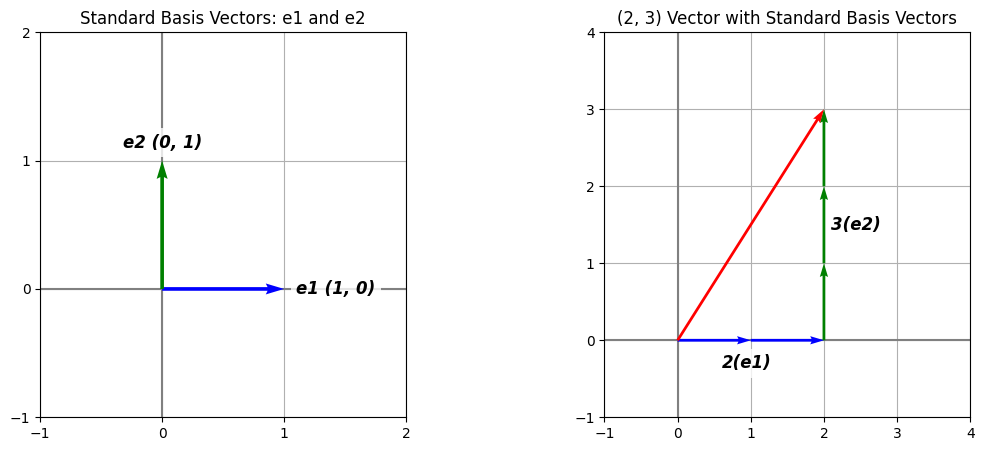

In [ ]:
fig = plt.figure(figsize=(12, 5))

# Creating standard basis vectors (e1 & e2)
ax1 = fig.add_subplot(1, 15, (1, 6))
ax1.quiver(0, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', width = .01, zorder=3)
ax1.quiver(0, 0, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', width = .01, zorder=3)

# Adding enhanced text annotations
ax1.text(1.1, 0, 'e1 (1, 0)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax1.text(0, 1.1, 'e2 (0, 1)', color='black', horizontalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax1.set_xlim(-1, 2)
ax1.set_ylim(-1, 2)
ax1.axhline(0, color='grey', linewidth=1.5)
ax1.axvline(0, color='grey', linewidth=1.5)

# Set the grid to show at each integer interval
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(1))

ax1.grid(True)
ax1.set_title('Standard Basis Vectors: e1 and e2')

# Creating (2, 3) vector with standard basis vector breakdown
ax2 = fig.add_subplot(1, 15, (10, 15))
ax2.quiver(0, 0, *vector, color=['r'], scale=1, scale_units='xy', angles='xy', zorder=4)
ax2.quiver(0, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(1, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(2, 0, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(2, 1, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(2, 2, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)

ax2.text(.6, -.3, '2(e1)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax2.text(2.1, 1.5, '3(e2)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax2.set_xlim(-1, 4)
ax2.set_ylim(-1, 4)
ax2.axhline(0, color='grey', linewidth=1.5)
ax2.axvline(0, color='grey', linewidth=1.5)

ax2.grid(True)
ax2.set_title('(2, 3) Vector with Standard Basis Vectors')

fig.savefig('StandardBasisVectors.png')

Figure 6 (Standard Basis Vectors + Linear Transformation)

In [ ]:
std_basis_vector_x = np.array([1, 0])
std_basis_vector_y = np.array([0, 1])

vector = np.array([2, 3])

A = np.array([[2, 1],
              [1, 2]])

In [ ]:
codomain_basis_vector_x = A @ std_basis_vector_x
codomain_basis_vector_y = A @ std_basis_vector_y

In [ ]:
transformed_vector = A @ vector

In [ ]:
transformed_vector

array([7, 8])

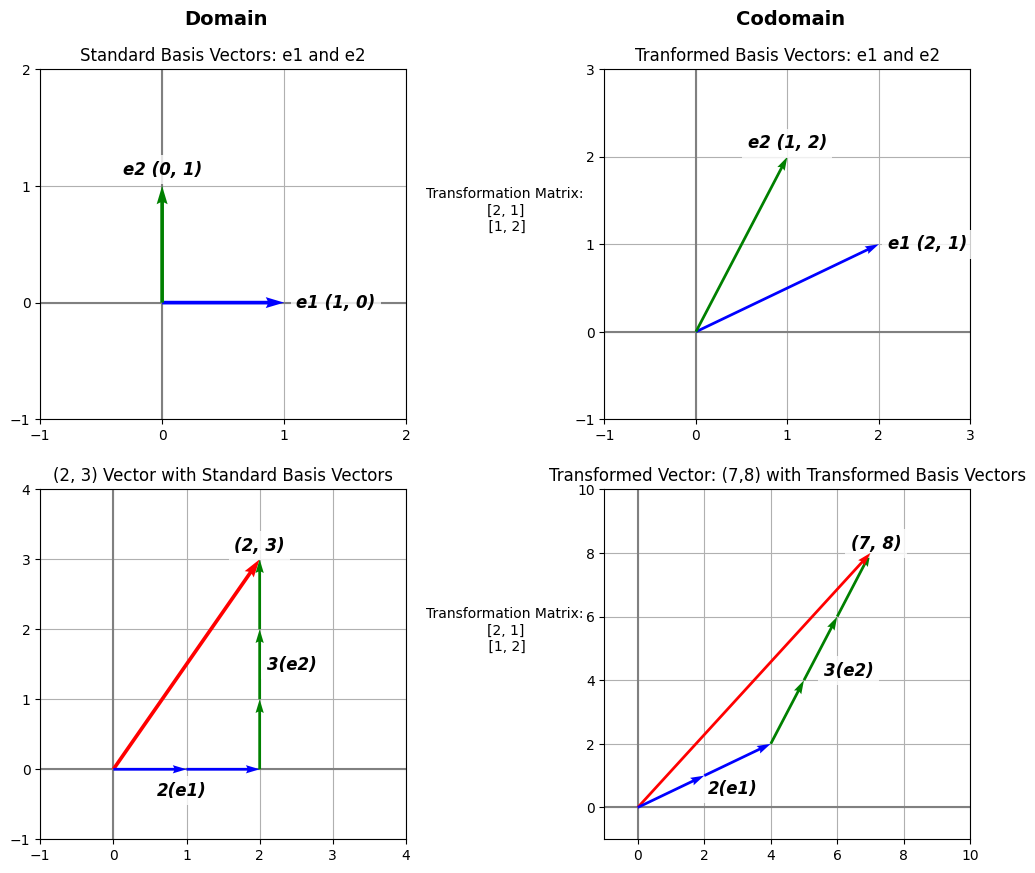

In [ ]:
fig = plt.figure(figsize=(12, 10))


############### TOP LEFT ###############

# Creating standard basis vectors (e1 & e2)
ax1 = fig.add_subplot(2, 15, (1, 6))
ax1.quiver(0, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', width = .01, zorder=3)
ax1.quiver(0, 0, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', width = .01, zorder=3)

# Adding enhanced text annotations
ax1.text(1.1, 0, 'e1 (1, 0)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax1.text(0, 1.1, 'e2 (0, 1)', color='black', horizontalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax1.set_xlim(-1, 2)
ax1.set_ylim(-1, 2)
ax1.axhline(0, color='grey', linewidth=1.5)
ax1.axvline(0, color='grey', linewidth=1.5)

# Set the grid to show at each integer interval
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_major_locator(MultipleLocator(1))

ax1.grid(True)
ax1.set_title('Standard Basis Vectors: e1 and e2')


############### BOTTOM LEFT ###############

# Creating standard vector
ax4 = fig.add_subplot(2, 15, (16, 21))
ax4.quiver(0, 0, *vector, color=['r'], scale=1, scale_units='xy', angles='xy', width=.01, zorder=3)
ax4.quiver(0, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax4.quiver(1, 0, *std_basis_vector_x, color=['b'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax4.quiver(2, 0, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax4.quiver(2, 1, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)
ax4.quiver(2, 2, *std_basis_vector_y, color=['g'], scale=1, scale_units='xy', angles='xy', zorder=3)

ax4.text(.6, -.3, '2(e1)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax4.text(2.1, 1.5, '3(e2)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax4.text(1.65, 3.2, '(2, 3)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax4.set_xlim(-1, 4)
ax4.set_ylim(-1, 4)
ax4.axhline(0, color='grey', linewidth=1.5)
ax4.axvline(0, color='grey', linewidth=1.5)

ax4.grid(True)
ax4.set_title('(2, 3) Vector with Standard Basis Vectors')


############### TOP RIGHT ###############

ax2 = fig.add_subplot(2, 15, (10, 15))
ax2.quiver(0, 0, *codomain_basis_vector_x, color=['b'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=3)
ax2.quiver(0, 0, *codomain_basis_vector_y, color=['g'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=3)

# Adding enhanced text annotations
ax2.text(2.1, 1, 'e1 (2, 1)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax2.text(1, 2.1, 'e2 (1, 2)', color='black', horizontalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax2.set_xlim(-1, 3)
ax2.set_ylim(-1, 3)
ax2.axhline(0, color='grey', linewidth=1.5)
ax2.axvline(0, color='grey', linewidth=1.5)

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(1))

ax2.grid(True)
ax2.set_title('Tranformed Basis Vectors: e1 and e2')


############### BOTTOM RIGHT ###############

ax5 = fig.add_subplot(2, 15, (25, 30))
ax5.quiver(0, 0, *transformed_vector, color=['r'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(0, 0, *codomain_basis_vector_x, color=['b'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(*codomain_basis_vector_x, *codomain_basis_vector_x, color=['b'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(*(2*codomain_basis_vector_x), *codomain_basis_vector_y, color=['g'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(*(2*codomain_basis_vector_x + codomain_basis_vector_y), *codomain_basis_vector_y, color=['g'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=4)
ax5.quiver(*(2*codomain_basis_vector_x + 2*codomain_basis_vector_y), *codomain_basis_vector_y, color=['g'], scale=1, linewidth=2.0, scale_units='xy', angles='xy', zorder=3)

ax5.text(2.1, .6, '2(e1)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax5.text(5.6, 4.3, '3(e2)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
ax5.text(6.4, 8.3, '(7, 8)', color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

ax5.set_xlim(-1, 10)
ax5.set_ylim(-1, 10)
ax5.axhline(0, color='grey', linewidth=1.5)
ax5.axvline(0, color='grey', linewidth=1.5)

ax2.xaxis.set_major_locator(MultipleLocator(1))
ax2.yaxis.set_major_locator(MultipleLocator(1))

ax5.grid(True)
ax5.set_title('Transformed Vector: (7,8) with Transformed Basis Vectors')


############### TRANSFORMATION MATRIX TOP ###############

matrix_str = f'Transformation Matrix:\n[2, 1]\n [1, 2]'

ax3 = fig.add_subplot(2,15, 8)
ax3.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')

ax3.axis('off')

############### TRANSFORMATION MATRIX BOTTOM ###############
ax6 = fig.add_subplot(2,15, 23)
ax6.annotate(matrix_str, xy=(.5, .5), xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=10, color='black')

ax6.axis('off')

############### DOMAIN AND CODOMAIN LABELS ###############

# Adding domain label
fig.text(0.28, .93, 'Domain', ha='center', va='center', fontsize=14, fontweight='bold')

# Adding codomain label
fig.text(0.75, .93, 'Codomain', ha='center', va='center', fontsize=14, fontweight='bold')

fig.savefig('StandardBasisVectors+LinearTransformation.png')

#Figure 7 (Column Space)

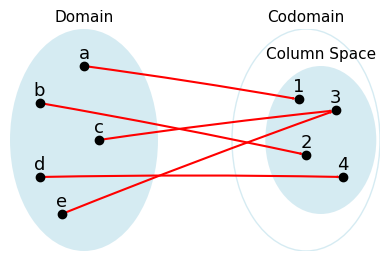

In [ ]:
def draw_set(ax, center, width, height, label, points, point_labels, ec, color):
    # Draw an oval representing a set
    set_oval = patches.Ellipse(center, width, height, ec=ec, color=color, fill=True, alpha=0.5)
    ax.add_patch(set_oval)
    ax.text(center[0], center[1] + height/2 + 0.1, label, ha='center', fontsize=11)

    # Draw points inside the oval
    for i, point in enumerate(points):
        ax.plot(center[0] + point[0], center[1] + point[1], 'o', color='black')
        ax.text(center[0] + point[0], center[1] + point[1] + 0.1, point_labels[i], ha='center', fontsize=13)

# Initialize plot
fig, ax = plt.subplots(figsize=(4, 3))

# Define properties for domain and codomain
domain_center = [1.5, 0]
codomain_center = [4.5, 0]
set_width, set_height = 2, 3

# Points in the domain and codomain
domain_points = np.array([[0, 1], [-0.6, 0.5], [0.2, 0], [-0.6, -0.5], [-0.3, -1]])
codomain_points = np.array([[-0.1, .55], [0, -0.2], [0.4, 0.4], [0.5, -0.5]])

# Draw sets
draw_set(ax, domain_center, set_width, set_height, 'Domain', domain_points, ['a', 'b', 'c', 'd', 'e'], ec = None, color = 'lightblue')
draw_set(ax, codomain_center, set_width, set_height, 'Codomain', codomain_points, ['1', '2', '3', '4'], ec = 'lightblue', color = 'white')
draw_set(ax, [4.7, 0], 1.5, 2, 'Column Space',[],[], ec = None, color = 'lightblue')

# Draw arrows from domain to codomain points
mappings = [0, 1, 2, 3, 2]  # Mapping index from domain points to codomain points
for d_point, map_idx in zip(domain_points, mappings):
    arrow = patches.FancyArrowPatch((domain_center[0] + d_point[0], domain_center[1] + d_point[1]),
                                    (codomain_center[0] + codomain_points[map_idx][0], codomain_center[1] + codomain_points[map_idx][1]),
                                    connectionstyle="arc3,rad=-.01", color="red", arrowstyle='->', linewidth=1.5)
    ax.add_patch(arrow)

# Set limits and aspect
ax.set_aspect('equal')
ax.axis('off')  # Turn off the axis
plt.tight_layout(h_pad=0.0, w_pad=0.0)
plt.margins(0)
plt.show()

fig.savefig('MappingColumnSpace.png')

#Figure 8 & 9 methods (preserves vector addition and scalar multiplication)

In [ ]:
def draw_plot(ax, plot_location, origin, vectors, colors, texts, num_vectors, xy_lim, title):
  ax = fig.add_subplot(plot_rows, plot_cols, plot_location)

  for i in range(num_vectors):
    ax.quiver(*origin, *vectors[i], color=colors[i], scale=1, scale_units='xy', angles='xy', width=.01, zorder=4)
    ax.text(vectors[i][0] - .5, vectors[i][1] + .3, texts[i], color='black', verticalalignment='center', fontsize=12, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
  ax.set_xlim(xy_lim)
  ax.set_ylim(xy_lim)
  ax.axhline(0, color='grey', linewidth=1.5)
  ax.axvline(0, color='grey', linewidth=1.5)
  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.yaxis.set_major_locator(MultipleLocator(1))
  ax.grid(True)
  ax.set_title(title)

def text_plot(ax, plot_location, texts, text_locations, num_texts):
  ax = fig.add_subplot(plot_rows, plot_cols, plot_location)
  for i in range(num_texts):
    text = texts[i]
    text_location = text_locations[i]
    ax.annotate(text, xy=text_location, xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=14, color='black')
  ax.axis('off')

#Figure 8 (preserves vector addition)

In [ ]:
vector_1 = np.array([1, 2])
vector_2 = np.array([3, 1])

A = np.array([[0, 1],
              [1, 0]])

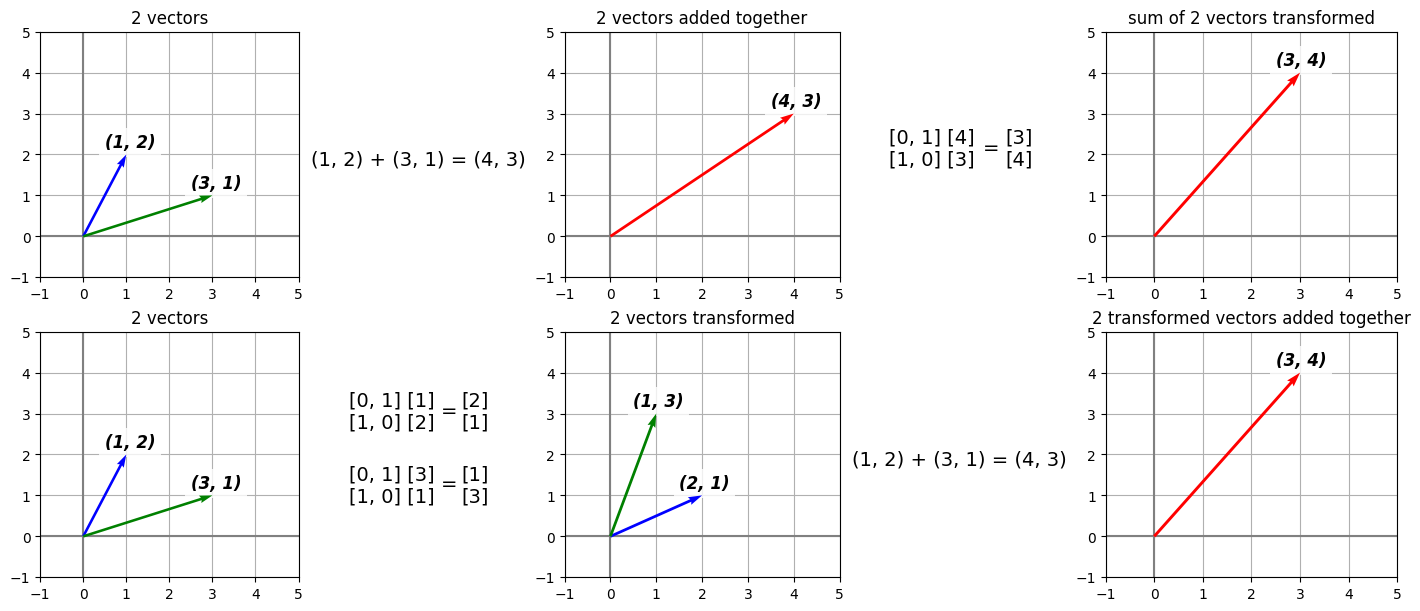

In [ ]:
plot_rows = 2
plot_cols = 13
xy_lim = [-1, 5]

# Create figure size before
fig, ax = plt.subplots(plot_rows, plot_cols, figsize=(14, 6), constrained_layout=True)

for i in range(plot_rows):
  for j in range(plot_cols):
    ax[i][j].axis('off')

################ TOP ROW ################

# 2 vectors -> 2 vectors added together -> sum of 2 vectors transformed
draw_plot(ax, (1, 3), [0, 0], [vector_1, vector_2], ['b', 'g'], ['(1, 2)', '(3, 1)'], 2, xy_lim, "2 vectors")
draw_plot(ax, (6, 8), [0, 0], [vector_1 + vector_2], ['r'], ['(4, 3)'], 1, xy_lim, "2 vectors added together")
draw_plot(ax, (11, 13), [0, 0], [A @ (vector_1 + vector_2)], ['r'], ['(3, 4)'], 1, xy_lim, "sum of 2 vectors transformed")

# 2 vectors added together
text_2_vector_sum = f'(1, 2) + (3, 1) = (4, 3)'
text_plot(ax, (4, 5), [text_2_vector_sum], [(0.5, 0.4)], 1)

# sum of 2 vectors transformed
text_linear_transformation_1 = f'[0, 1] [4]\n[1, 0] [3]'
text_equal_1 = f'='
text_linear_transformation_ans_1 = f'[3]\n[4]'
text_plot(ax, (9, 10), [text_linear_transformation_1, text_equal_1, text_linear_transformation_ans_1], [(0.35, 0.4), (0.67, 0.45), (0.82, 0.4)], 3)

############### BOTTOM ROW ###############

# 2 vectors -> 2 vectors transformed -> 2 transformed vectors added together
draw_plot(ax, (14, 16), [0, 0], [vector_1, vector_2], ['b', 'g'], ['(1, 2)', '(3, 1)'], 2, xy_lim, "2 vectors")
draw_plot(ax, (19, 21), [0, 0], [A @ vector_1, A @ vector_2], ['b', 'g'], ['(2, 1)', '(1, 3)'], 2, xy_lim, "2 vectors transformed")
draw_plot(ax, (24, 26), [0, 0], [A @ vector_1 + A @ vector_2], ['r'], ['(3, 4)'], 1, xy_lim, "2 transformed vectors added together")

# 2 vectors transformed
text_linear_transformation_2 = f'[0, 1] [1]\n[1, 0] [2]'
text_equal_2 = f'='
text_linear_transformation_ans_2 = f'[2]\n[1]'
text_linear_transformation_3 = f'[0, 1] [3]\n[1, 0] [1]'
text_equal_3 = f'='
text_linear_transformation_ans_3 = f'[1]\n[3]'
text_plot(ax, (17, 18),
         [text_linear_transformation_2, text_equal_2, text_linear_transformation_ans_2, text_linear_transformation_3, text_equal_3, text_linear_transformation_ans_3],
          [(0.35, 0.55), (0.67, 0.6), (0.82, 0.55), (0.35, 0.25), (0.67, 0.3), (0.82, 0.25)], 6)

# 2 transformed vectors added together
text_2_transformed_vector_sum = f'(2, 1) + (1, 3) = (3, 4)'
text_plot(ax, (22, 23), [text_2_vector_sum], [(0.5, 0.4)], 1)

# plt.tight_layout(pad=2.0)
fig.savefig('PreserveVectorAddition.png')

#Figure 9 (preserves scalar multiplication)

In [ ]:
# Display a single vector on a plot

# Scale the vector and then transform it

# Transform the vector and then scale it

In [ ]:
vector = np.array([2, 1])
scaling_factor = 2

A = np.array([[0, 1],
              [1, 0]])

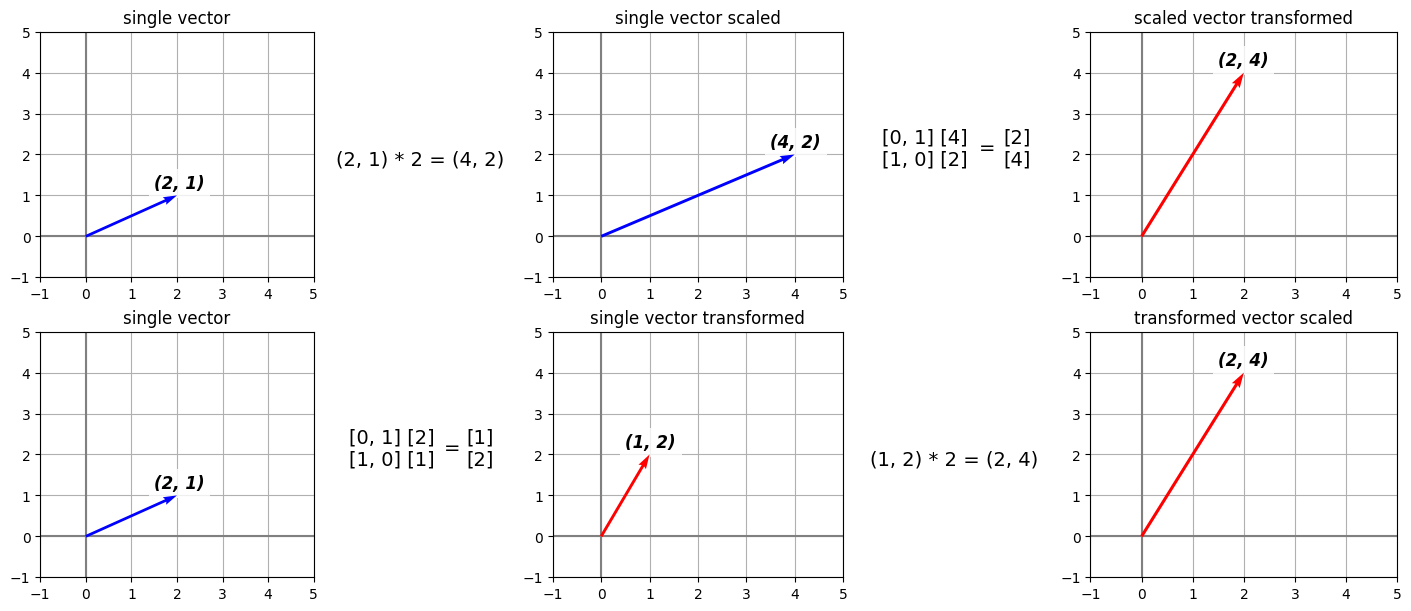

In [ ]:
plot_rows = 2
plot_cols = 13
xy_lim = [-1, 5]

# Create figure size before
fig, ax = plt.subplots(plot_rows, plot_cols, figsize=(14, 6), constrained_layout=True)

for i in range(plot_rows):
  for j in range(plot_cols):
    ax[i][j].axis('off')

################ TOP ROW ################

# single vector -> single vector scaled -> scaled vector transformed
draw_plot(ax, (1, 3), [0, 0], [vector], ['b'], ['(2, 1)'], 1, xy_lim, "single vector")
draw_plot(ax, (6, 8), [0, 0], [vector * scaling_factor], ['b'], ['(4, 2)'], 1, xy_lim, "single vector scaled")
draw_plot(ax, (11, 13), [0, 0], [A @ (vector * scaling_factor)], ['r'], ['(2, 4)'], 1, xy_lim, "scaled vector transformed")

# single vector scaled
text_2_vector_sum = f'(2, 1) * 2 = (4, 2)'
text_plot(ax, (4, 5), [text_2_vector_sum], [(0.5, 0.4)], 1)

# # scaled vector transformed
text_linear_transformation_1 = f'[0, 1] [4]\n[1, 0] [2]'
text_equal_1 = f'='
text_linear_transformation_ans_1 = f'[2]\n[4]'
text_plot(ax, (9, 10), [text_linear_transformation_1, text_equal_1, text_linear_transformation_ans_1], [(0.35, 0.4), (0.67, 0.45), (0.82, 0.4)], 3)

############### BOTTOM ROW ###############

# single vector -> single vector transformed -> transformed vector scaled
draw_plot(ax, (14, 16), [0, 0], [vector], ['b'], ['(2, 1)'], 1, xy_lim, "single vector")
draw_plot(ax, (19, 21), [0, 0], [A @ vector], ['r'], ['(1, 2)'], 1, xy_lim, "single vector transformed")
draw_plot(ax, (24, 26), [0, 0], [A @ vector * 2], ['r'], ['(2, 4)'], 1, xy_lim, "transformed vector scaled")

# single vector transformed
text_linear_transformation_2 = f'[0, 1] [2]\n[1, 0] [1]'
text_equal_2 = f'='
text_linear_transformation_ans_2 = f'[1]\n[2]'
text_plot(ax, (17, 18),
         [text_linear_transformation_2, text_equal_2, text_linear_transformation_ans_2],
          [(0.35, 0.4), (0.67, 0.45), (0.82, 0.4)], 3)

# transformed vector scaled
text_transformed_vector_scaled = f'(1, 2) * 2 = (2, 4)'
text_plot(ax, (22, 23), [text_transformed_vector_scaled], [(0.5, 0.4)], 1)

fig.savefig('PreservesScalarMultiplication.png')

# Figure 10 (Contents Of A Matrix Transforming A Vector)
1-- The row way (algebraic perspective)

In [ ]:
def draw_and_text_plot(ax, plot_location, xy_lim, texts, text_locations, text_fonts, num_texts, origin, vectors, num_vectors, title):
  ax = fig.add_subplot(plot_rows, plot_cols, plot_location)

  # texts
  for i in range(num_texts):
    text = texts[i]
    text_location = text_locations[i]
    ax.annotate(text, xy=text_location, xycoords='data', textcoords='offset points',
             xytext=(0, 10), ha='center', fontsize=text_fonts[i], color='black')

  # plots
  for i in range(num_vectors):
    ax.quiver(*origin[i], *vectors[i], color=['r'], scale=1, scale_units='xy', angles='xy')

  ax.set_xlim(xy_lim)
  ax.set_ylim(xy_lim)
  ax.set_title(title)



def draw_plot(ax, plot_location, origin, vectors, colors, texts, num_vectors, xy_lim, title):
  ax = fig.add_subplot(plot_rows, plot_cols, plot_location)

  for i in range(num_vectors):
    ax.quiver(*origin, *vectors[i], color=colors[i], scale=1, scale_units='xy', angles='xy', width=.01, zorder=4)
    ax.text(vectors[i][0] - .5, vectors[i][1] + .3, texts[i], color='black', verticalalignment='center', fontsize=20, fontweight='bold', style='italic', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
  ax.set_xlim(xy_lim)
  ax.set_ylim(xy_lim)
  ax.axhline(0, color='grey', linewidth=1.5)
  ax.axvline(0, color='grey', linewidth=1.5)
  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.yaxis.set_major_locator(MultipleLocator(1))
  ax.grid(True)
  ax.set_title(title)

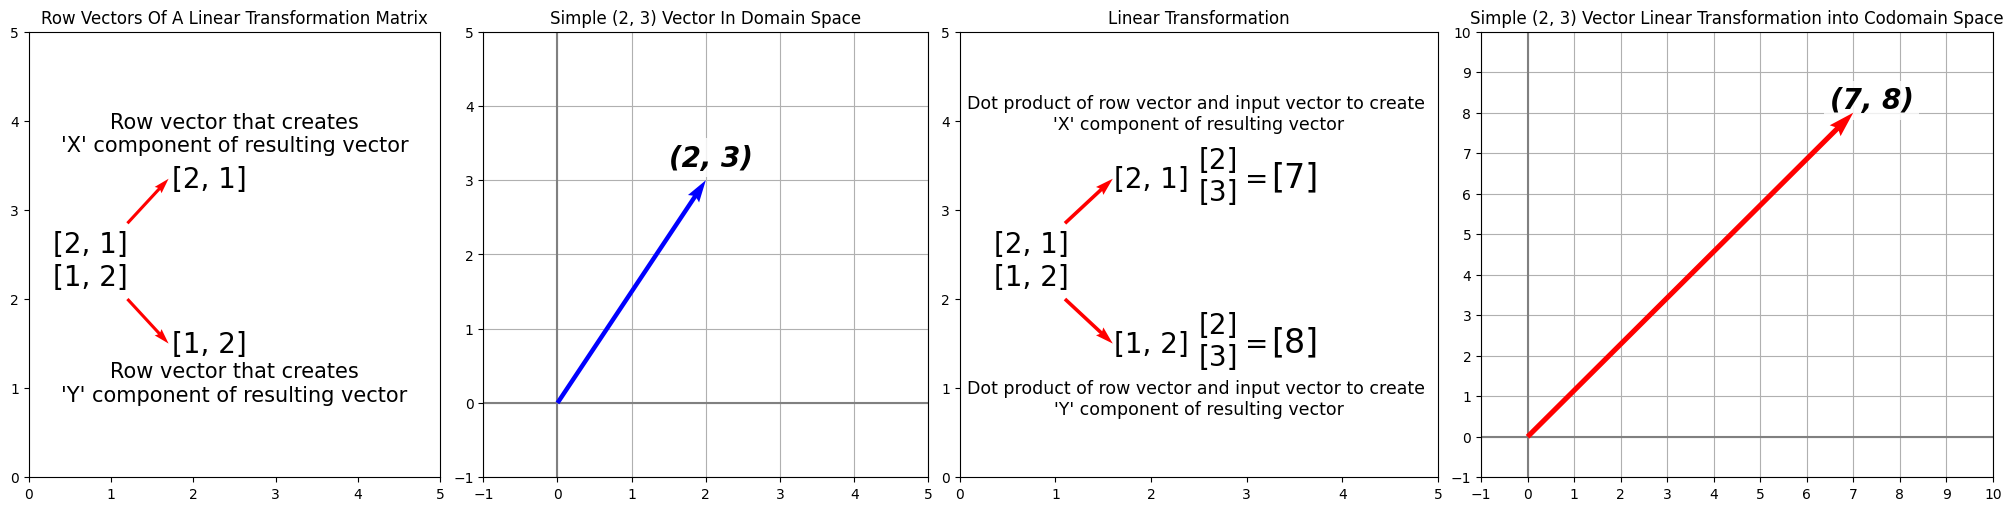

In [ ]:
plot_rows = 1
plot_cols = 20
xy_lim = [0, 5]

# Create figure size before
fig, ax = plt.subplots(plot_rows, plot_cols, figsize=(20, 5), constrained_layout=True)

for i in range(plot_cols):
  ax[i].axis('off')

################ FIGURE 1 ################

# Row Vectors from matrix that will create individual components of output vector

# text variables
text_linear_transformation_matrix = f'[2, 1]\n[1, 2]'
text_top_row_vector = f'[2, 1]'
text_top_row_explain = f'Row vector that creates\n\'X\' component of resulting vector'
text_bottom_row_vector = f'[1, 2]'
text_bottom_row_explain = f'Row vector that creates\n\'Y\' component of resulting vector'
text_location = [(.75, 2), (2.2, 3.1), (2.2, 1.25), (2.5, 3.5), (2.5, .7)]
text_fonts = [20, 20, 20, 15, 15]
num_texts = 5

# plot variables
origin = [[1.20, 2.85], [1.20, 2.0]]
vectors = [[.5, .5], [.5, -.5]]
num_vectors = len(vectors)

draw_and_text_plot(ax, (1, 5), xy_lim,
                  [text_linear_transformation_matrix, text_top_row_vector, text_bottom_row_vector, text_top_row_explain, text_bottom_row_explain], text_location, text_fonts, num_texts,
                   origin, vectors, num_vectors, "Row Vectors Of A Linear Transformation Matrix")


################ FIGURE 2 ################

# Plotting simple vector in domain space
draw_plot(ax, (6, 10), [0, 0], [(2, 3)], ['b'], ['(2, 3)'], 1, [-1, 5], "Simple (2, 3) Vector In Domain Space")


################ FIGURE 3 ################

# Dot product between matrix and input vector (linear transformation)

# text variables
text_linear_transformation_matrix = f'[2, 1]\n[1, 2]'
text_input_vector = f'[2]\n[3]'
text_equals_sign = f'='

text_top_row_vector = f'[2, 1]'
text_top_row_ans = f'[7]'
text_top_row_explain = f'Dot product of row vector and input vector to create \n\'X\' component of resulting vector'

text_bottom_row_vector = f'[1, 2]'
text_bottom_row_ans = f'[8]'
text_bottom_row_explain = f'Dot product of row vector and input vector to create \n\'Y\' component of resulting vector'


text_location = [(.75, 2),
                 (2, 3.1), (2.7, 2.95), (3.1, 3.1), (3.5, 3.1), (2.5, 3.75),
                  (2, 1.25), (2.7, 1.1), (3.1, 1.25), (3.5, 1.25), (2.5, .55)]
text_fonts = [20,
              20, 20, 20, 24, 12.5,
              20, 20, 20, 24, 12.5]
num_texts = 11

# plot variables
origin = [[1.10, 2.85], [1.10, 2.0]]
vectors = [[.5, .5], [.5, -.5]]
num_vectors = len(vectors)

draw_and_text_plot(ax, (11, 15), xy_lim,
                  [text_linear_transformation_matrix,
                   text_top_row_vector, text_input_vector, text_equals_sign, text_top_row_ans, text_top_row_explain,
                   text_bottom_row_vector, text_input_vector, text_equals_sign, text_bottom_row_ans, text_bottom_row_explain],
                   text_location, text_fonts, num_texts,
                   origin, vectors, num_vectors, "Linear Transformation")


################ FIGURE 4 ################

# Plotting simple vector in codomain space
draw_plot(ax, (16, 20), [0, 0], [(7, 8)], ['r'], ['(7, 8)'], 1, [-1, 10], "Simple (2, 3) Vector Linear Transformation into Codomain Space")


fig.savefig('AlgebraicPerspectiveLinearTransformation.png')

2 - The column way (geometric perspective)

In [ ]:
def draw_and_text_plot2(ax, plot_location, xy_lim, texts, text_locations, text_fonts, num_texts, text_fontweights, text_styles,
                        origin, vectors, colors, widths, num_vectors, zorders, title, grid = False):

  ax = fig.add_subplot(plot_rows, plot_cols, plot_location)

  # texts
  for i in range(num_texts):
    ax.text(text_locations[i][0], text_locations[i][1], texts[i], color="black", verticalalignment='center', fontsize=text_fonts[i], fontweight=text_fontweights[i], style=text_styles[i], bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

  # plots
  for i in range(num_vectors):
    ax.quiver(*origin[i], *vectors[i], color=colors[i], scale=1, scale_units='xy', angles='xy', width = widths[i], zorder = zorders[i])

  ax.set_xlim(xy_lim)
  ax.set_ylim(xy_lim)
  ax.axhline(0, color='grey', linewidth=1.5)
  ax.axvline(0, color='grey', linewidth=1.5)
  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.yaxis.set_major_locator(MultipleLocator(1))
  ax.grid(grid)
  ax.set_title(title)

In [ ]:
def draw_and_text_plot2(ax, plot_location, xy_lim, texts, text_locations, text_fonts, num_texts, text_fontweights, text_styles,
                        origin, vectors, colors, widths, num_vectors, zorders, title, grid = False):

  ax = fig.add_subplot(plot_rows, plot_cols, plot_location)

  # texts
  for i in range(num_texts):
    ax.text(text_locations[i][0], text_locations[i][1], texts[i], color="black", verticalalignment='center', fontsize=text_fonts[i], fontweight=text_fontweights[i], style=text_styles[i], bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

  # plots
  for i in range(num_vectors):
    ax.quiver(*origin[i], *vectors[i], color=colors[i], scale=1, scale_units='xy', angles='xy', width = widths[i], zorder = zorders[i])

  ax.set_xlim(xy_lim)
  ax.set_ylim(xy_lim)
  ax.axhline(0, color='grey', linewidth=1.5)
  ax.axvline(0, color='grey', linewidth=1.5)
  ax.xaxis.set_major_locator(MultipleLocator(1))
  ax.yaxis.set_major_locator(MultipleLocator(1))
  ax.grid(grid)
  ax.set_title(title)

plot_rows = 2
plot_cols = 15
xy_lim = [0, 5]

# Create figure size before
fig, ax = plt.subplots(plot_rows, plot_cols, figsize=(15, 10), constrained_layout=True)

for i in range(plot_rows):
  for j in range(plot_cols):
    ax[i][j].axis('off')


################ FIGURE 1 ################

# Grid size
fig_2_xy_lim = [0, 5]

# Vectors and needed information
vectors = [(0, -.8), (0, -.8), (-.4, -.6), (.4, -.6)]
origins = [(1.75, 4.25), (3.15, 4.25), (1.75, 3.35), (3.15, 3.35)]
colors = ['b', 'g', 'b', 'g']
widths = [.007, .007, .007, .007]
zorders = [3, 3, 3, 3]

# Texts and needed information
texts = ['[1, 0]\n[0, 1]', 'X', 'Y', 'e1 = (1, 0)', 'e2 = (0, 1)']
text_locations = [(1.8, 3.85), (2.1, 4.6), (2.65, 4.6), (.2, 2.4), (2.6, 2.4)]
text_fonts = [28, 17, 17, 24, 24]
text_fontweight = [None, None, None, None, None]
text_style = [None, None, None, None, None]

draw_and_text_plot2(ax, (1, 5), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweight, text_style,
                    origins, vectors, colors, widths, len(vectors), zorders, 'Column Vectors Of The Identity Matrix', False)


################ FIGURE 2 ################

# Grid size
fig_2_xy_lim = [-1, 2]

# Vectors and needed information
vectors = [(1, 0), (0, 1)]
origins= [(0, 0), (0, 0)]
colors = ['b', 'g']
widths = [.01, .01]
zorders = [3, 3]

# Texts and needed information
texts = ['e1 (1, 0)', 'e2 (0, 1)']
text_locations = [(1.1, 0), (-.2, 1.15)]
text_fonts = [12, 12]
text_fontweights = ['bold', 'bold']
text_styles = ['italic', 'italic']

draw_and_text_plot2(ax, (6, 10), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweights, text_styles,
                    origins, vectors, colors, widths, len(vectors), zorders, 'Standard Basis Vectors: e1 and e2', True)


################ FIGURE 3 ################


# Grid size
fig_2_xy_lim = [-1, 4]

# Vectors and needed information
vectors = [(2, 3), (1, 0), (1, 0), (0,1), (0, 1), (0, 1)]
origins = [(0,0), (0,0), (1, 0), (2, 0), (2, 1), (2, 2)]
colors = ['r', 'b', 'b', 'g', 'g', 'g']
widths = [.01, .007, .007, .007, .007, .007]
zorders = [3, 3, 3, 3, 3, 3]

# Texts and needed information
texts = ['(2, 3)', '3(e2)', '2(e1)']
text_locations = [(1.75, 3.25), (2.1, 1.5), (.75, -.3)]
text_fonts = [13, 13, 13]
text_fontweights = ['bold', 'bold', 'bold']
text_styles = ['italic', 'italic', 'italic']

draw_and_text_plot2(ax, (11, 15), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweights, text_styles,
                    origins, vectors, colors, widths, len(vectors), zorders, '(2, 3) Vector with Standard Basis Vectors', True)


################ FIGURE 4 ################


# Grid size
fig_2_xy_lim = [0, 5]

# Vectors and needed information
vectors = [(0, -.8), (0, -.8), (-.4, -.6), (.4, -.6)]
origins = [(1.75, 4.25), (3.15, 4.25), (1.75, 3.35), (3.15, 3.35)]
colors = ['b', 'g', 'b', 'g']
widths = [.007, .007, .007, .007]
zorders = [3, 3, 3, 3]

# Texts and needed information
texts = ['[2, 1]\n[1, 2]', 'X', 'Y', 'T(e1) = (2, 1)', 'T(e2) = (1, 2)']
text_locations = [(1.8, 3.85), (2.1, 4.6), (2.65, 4.6), (.2, 2.4), (2.6, 2.4)]
text_fonts = [28, 17, 17, 20, 20]
text_fontweight = [None, None, None, None, None]
text_style = [None, None, None, None, None]

draw_and_text_plot2(ax, (16, 20), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweight, text_style,
                    origins, vectors, colors, widths, len(vectors), zorders, 'Column Vectors Of The Transformation Matrix', False)


################ FIGURE 5 ################

# Grid size
fig_2_xy_lim = [-1, 3]

# Vectors and needed information
vectors = [(2, 1), (1, 2)]
origins= [(0, 0), (0, 0)]
colors = ['b', 'g']
widths = [.01, .01]
zorders = [3, 3]

# Texts and needed information
texts = ['T(e1) (2, 1)', 'T(e2) (1, 2)']
text_locations = [(1.8, 1.2), (.8, 2.2)]
text_fonts = [12, 12]
text_fontweights = ['bold', 'bold']
text_styles = ['italic', 'italic']

draw_and_text_plot2(ax, (21, 25), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweights, text_styles,
                    origins, vectors, colors, widths, len(vectors), zorders, 'Transformed Basis Vectors: T(e1) and T(e2)', True)


################ FIGURE 6 ################


# Grid size
fig_2_xy_lim = [-1, 10]

# Vectors and needed information
vectors = [(7, 8), (2, 1), (2, 1), (1,2), (1, 2), (1, 2)]
origins = [(0,0), (0,0), (2, 1), (4, 2), (5, 4), (6, 6)]
colors = ['r', 'b', 'b', 'g', 'g', 'g']
widths = [.01, .007, .007, .007, .007, .007]
zorders = [3, 3, 3, 3, 3, 3]

# Texts and needed information
texts = ['(7, 8)', '3(T(e2))', '2(T(e1))']
text_locations = [(6.6, 8.4), (5.6, 4.5), (1.9, .4)]
text_fonts = [13, 13, 13]
text_fontweights = ['bold', 'bold', 'bold']
text_styles = ['italic', 'italic', 'italic']

draw_and_text_plot2(ax, (26, 30), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweights, text_styles,
                    origins, vectors, colors, widths, len(vectors), zorders, '(2, 3) Vector with Transformed Basis Vectors', True)

fig.savefig('GeometricPerspectiveLinearTransformation.png')

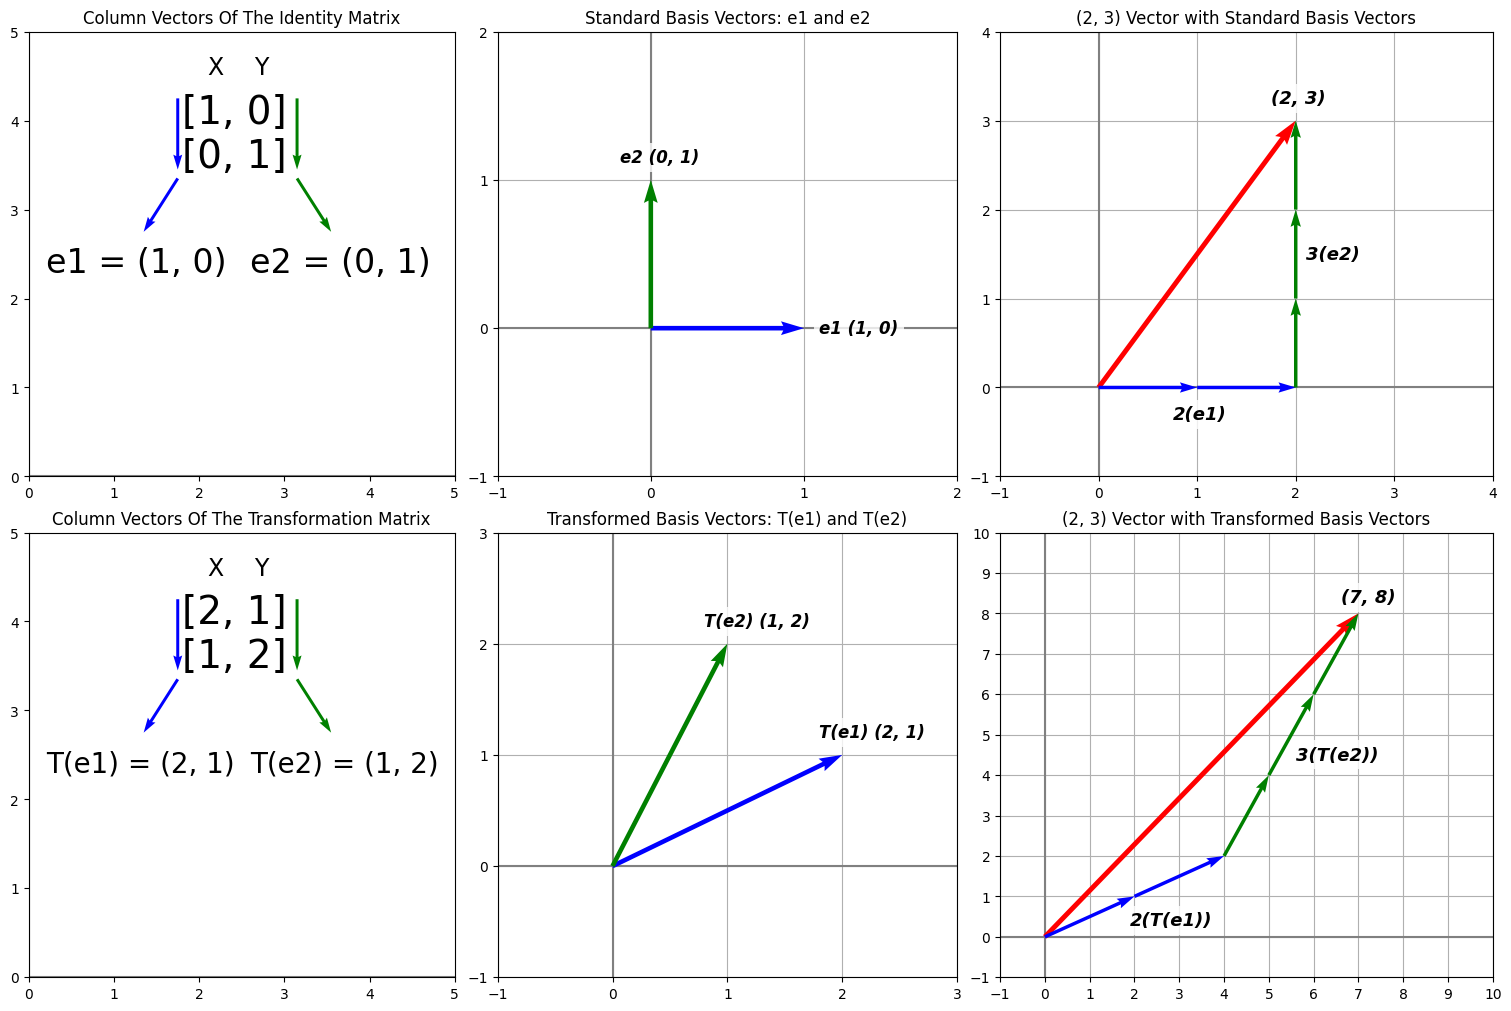

In [ ]:
plot_rows = 2
plot_cols = 15
xy_lim = [0, 5]

# Create figure size before
fig, ax = plt.subplots(plot_rows, plot_cols, figsize=(15, 10), constrained_layout=True)

for i in range(plot_rows):
  for j in range(plot_cols):
    ax[i][j].axis('off')


################ FIGURE 1 ################

# Grid size
fig_2_xy_lim = [0, 5]

# Vectors and needed information
vectors = [(0, -.8), (0, -.8), (-.4, -.6), (.4, -.6)]
origins = [(1.75, 4.25), (3.15, 4.25), (1.75, 3.35), (3.15, 3.35)]
colors = ['b', 'g', 'b', 'g']
widths = [.007, .007, .007, .007]
zorders = [3, 3, 3, 3]

# Texts and needed information
texts = ['[1, 0]\n[0, 1]', 'X', 'Y', 'e1 = (1, 0)', 'e2 = (0, 1)']
text_locations = [(1.8, 3.85), (2.1, 4.6), (2.65, 4.6), (.2, 2.4), (2.6, 2.4)]
text_fonts = [28, 17, 17, 24, 24]
text_fontweight = [None, None, None, None, None]
text_style = [None, None, None, None, None]

draw_and_text_plot2(ax, (1, 5), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweight, text_style,
                    origins, vectors, colors, widths, len(vectors), zorders, 'Column Vectors Of The Identity Matrix', False)


################ FIGURE 2 ################

# Grid size
fig_2_xy_lim = [-1, 2]

# Vectors and needed information
vectors = [(1, 0), (0, 1)]
origins= [(0, 0), (0, 0)]
colors = ['b', 'g']
widths = [.01, .01]
zorders = [3, 3]

# Texts and needed information
texts = ['e1 (1, 0)', 'e2 (0, 1)']
text_locations = [(1.1, 0), (-.2, 1.15)]
text_fonts = [12, 12]
text_fontweights = ['bold', 'bold']
text_styles = ['italic', 'italic']

draw_and_text_plot2(ax, (6, 10), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweights, text_styles,
                    origins, vectors, colors, widths, len(vectors), zorders, 'Standard Basis Vectors: e1 and e2', True)


################ FIGURE 3 ################


# Grid size
fig_2_xy_lim = [-1, 4]

# Vectors and needed information
vectors = [(2, 3), (1, 0), (1, 0), (0,1), (0, 1), (0, 1)]
origins = [(0,0), (0,0), (1, 0), (2, 0), (2, 1), (2, 2)]
colors = ['r', 'b', 'b', 'g', 'g', 'g']
widths = [.01, .007, .007, .007, .007, .007]
zorders = [3, 3, 3, 3, 3, 3]

# Texts and needed information
texts = ['(2, 3)', '3(e2)', '2(e1)']
text_locations = [(1.75, 3.25), (2.1, 1.5), (.75, -.3)]
text_fonts = [13, 13, 13]
text_fontweights = ['bold', 'bold', 'bold']
text_styles = ['italic', 'italic', 'italic']

draw_and_text_plot2(ax, (11, 15), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweights, text_styles,
                    origins, vectors, colors, widths, len(vectors), zorders, '(2, 3) Vector with Standard Basis Vectors', True)


################ FIGURE 4 ################


# Grid size
fig_2_xy_lim = [0, 5]

# Vectors and needed information
vectors = [(0, -.8), (0, -.8), (-.4, -.6), (.4, -.6)]
origins = [(1.75, 4.25), (3.15, 4.25), (1.75, 3.35), (3.15, 3.35)]
colors = ['b', 'g', 'b', 'g']
widths = [.007, .007, .007, .007]
zorders = [3, 3, 3, 3]

# Texts and needed information
texts = ['[2, 1]\n[1, 2]', 'X', 'Y', 'T(e1) = (2, 1)', 'T(e2) = (1, 2)']
text_locations = [(1.8, 3.85), (2.1, 4.6), (2.65, 4.6), (.2, 2.4), (2.6, 2.4)]
text_fonts = [28, 17, 17, 20, 20]
text_fontweight = [None, None, None, None, None]
text_style = [None, None, None, None, None]

draw_and_text_plot2(ax, (16, 20), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweight, text_style,
                    origins, vectors, colors, widths, len(vectors), zorders, 'Column Vectors Of The Transformation Matrix', False)


################ FIGURE 5 ################

# Grid size
fig_2_xy_lim = [-1, 3]

# Vectors and needed information
vectors = [(2, 1), (1, 2)]
origins= [(0, 0), (0, 0)]
colors = ['b', 'g']
widths = [.01, .01]
zorders = [3, 3]

# Texts and needed information
texts = ['T(e1) (2, 1)', 'T(e2) (1, 2)']
text_locations = [(1.8, 1.2), (.8, 2.2)]
text_fonts = [12, 12]
text_fontweights = ['bold', 'bold']
text_styles = ['italic', 'italic']

draw_and_text_plot2(ax, (21, 25), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweights, text_styles,
                    origins, vectors, colors, widths, len(vectors), zorders, 'Transformed Basis Vectors: T(e1) and T(e2)', True)


################ FIGURE 6 ################


# Grid size
fig_2_xy_lim = [-1, 10]

# Vectors and needed information
vectors = [(7, 8), (2, 1), (2, 1), (1,2), (1, 2), (1, 2)]
origins = [(0,0), (0,0), (2, 1), (4, 2), (5, 4), (6, 6)]
colors = ['r', 'b', 'b', 'g', 'g', 'g']
widths = [.01, .007, .007, .007, .007, .007]
zorders = [3, 3, 3, 3, 3, 3]

# Texts and needed information
texts = ['(7, 8)', '3(T(e2))', '2(T(e1))']
text_locations = [(6.6, 8.4), (5.6, 4.5), (1.9, .4)]
text_fonts = [13, 13, 13]
text_fontweights = ['bold', 'bold', 'bold']
text_styles = ['italic', 'italic', 'italic']

draw_and_text_plot2(ax, (26, 30), fig_2_xy_lim, texts, text_locations, text_fonts, len(texts), text_fontweights, text_styles,
                    origins, vectors, colors, widths, len(vectors), zorders, '(2, 3) Vector with Transformed Basis Vectors', True)

fig.savefig('GeometricPerspectiveLinearTransformation.png')